In [255]:
import requests
from bs4 import BeautifulSoup

###requests는 파이썬에서 http 요청을 보낼 때 쓸 라이브러리, BeautifulSoup는 html에서 정보를 간단하게 빼오기 위해 사용할 라이브러리

In [256]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=81892&m=0&p=1"
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')
html


<!--  앱 평가 리스트 시작 -->
<div class="subra" style="border-top:1px solid #ccc;">
<ul>
<li>
<div class="photo">
<img alt="Andrew*** 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">Andrew***</span> <span class="level_ico score3">2</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					kb모바일 인증서 발급을 위해 휴대폰 인증 후 신분증 촬영을 하는데 제대로 찍혔음에도 불고하고 앞자리는 자꾸 나타나지도 수정도 안됩니다. 뒷자리는 되구요. 고쳐주세요 1시간째 하고 있음.. //////( 아니 그럼 인식이 안되어야죠. 인식은 다해서 다른건 잘 뜨는데 주민번호만 아예 안떠요. 그럼 뭔가 문제 있는게 아닌가요..?
				</p>
</div>
</li>
<li>
<div class="photo">
<img alt="김종* 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">김종*</span> <span class="level_ico score3">2</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					모바일 인증서를 처음에 만들었으나 이후 모바일 인증서 조회가

In [257]:
score_result = html.find('div', {'class': 'subra'})
lis = score_result.findAll('li')
lis[0]

<li>
<div class="photo">
<img alt="Andrew*** 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">Andrew***</span> <span class="level_ico score3">2</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					kb모바일 인증서 발급을 위해 휴대폰 인증 후 신분증 촬영을 하는데 제대로 찍혔음에도 불고하고 앞자리는 자꾸 나타나지도 수정도 안됩니다. 뒷자리는 되구요. 고쳐주세요 1시간째 하고 있음.. //////( 아니 그럼 인식이 안되어야죠. 인식은 다해서 다른건 잘 뜨는데 주민번호만 아예 안떠요. 그럼 뭔가 문제 있는게 아닌가요..?
				</p>
</div>
</li>

In [258]:
review_text = lis[0].findAll('p')[1].getText()
review_text


'\r\n\t\t\t\t\tkb모바일 인증서 발급을 위해 휴대폰 인증 후 신분증 촬영을 하는데 제대로 찍혔음에도 불고하고 앞자리는 자꾸 나타나지도 수정도 안됩니다. 뒷자리는 되구요. 고쳐주세요 1시간째 하고 있음.. //////( 아니 그럼 인식이 안되어야죠. 인식은 다해서 다른건 잘 뜨는데 주민번호만 아예 안떠요. 그럼 뭔가 문제 있는게 아닌가요..?\r\n\t\t\t\t'

In [259]:
review_score=lis[0].find_all('span')[1].getText()
review_score

'2'

In [260]:
customer=lis[0].find_all('span')[0].getText()
customer

'Andrew***'

In [268]:
test_url1 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=81892&m=0&p=1"
def get_data(url):#1페이지를 크롤링하는 메소드
    temp_list=[]
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    score_result = html.find('div', {'class': 'subra'})
    lis = score_result.findAll('li')
    for li in lis:
        review_text = li.find_all('p')[1].getText()
        review_score=li.find_all('span')[1].getText()
        customer=li.find_all('span')[0].getText()
        temp_list.append([customer,review_text,review_score])
    raw_df=pd.DataFrame(data=temp_list,columns=['Customer','Review','Score'])
    return raw_df

In [269]:
test_url2 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=81892&m=0&p=2"

In [270]:
a=get_data(test_url1)
b=get_data(test_url2)

In [264]:
print(type(a))

<class 'pandas.core.frame.DataFrame'>


In [265]:
print(type(b))

<class 'pandas.core.frame.DataFrame'>


In [271]:
a

,Customer,Review,Score
0,Andrew***,\r\n\t\t\t\t\tkb모바일 인증서 발급을 위해 휴대폰 인증 후 신분증 촬영...,2
1,김종*,\r\n\t\t\t\t\t모바일 인증서를 처음에 만들었으나 이후 모바일 인증서 조회...,2
2,탁선*,\r\n\t\t\t\t\t이건 모하자는건지.. 공인인증서 로그인 안됩니다. 몇십번을...,1
3,손경*,\r\n\t\t\t\t\t별하나도 아까움 앱로긴부터 안되고 앱삭제 설치 무한반복 화...,1
4,윤선*,\r\n\t\t\t\t\t모바일인증서 클릭시 화면이 멈춥니다. 다른방법으로 로그인잘...,1
5,SC**,\r\n\t\t\t\t\t원래 느리지만 업데이트하고 너무 느리네요. 은행 앱 들어와...,2
6,식영**,\r\n\t\t\t\t\t아니 왜 카드촬영이 안되게 바뀌었나요? 저번 달부터 계좌잔...,1
7,갸*,\r\n\t\t\t\t\t리뷰댓에 담당하는분이 고생 많으시네요. 업데이트 진행하였으...,5
8,허인*,\r\n\t\t\t\t\t스타샷은 왜 만들어 놓은 거예요? 직원들은 스타샷이라고 말...,1
9,c제*,\r\n\t\t\t\t\t갤럭시S10+입니다. 유독KB은행 앱만 지문인식이 자꾸 안...,3


In [267]:
b

,0,1,2
0,soy k***,\r\n\t\t\t\t\t갑자기 앱구동이 안되어서 글쓰러 왔는데 저만 그런게 아니네...,1
1,김효*,\r\n\t\t\t\t\t기업은행 사용하다 주거래 은행 변경으로 최근 사용이 많아졌...,3
2,이채*,\r\n\t\t\t\t\t지금 지문인증에 문제 있는거 같은데요. 제거랑 아버지거 두...,3
3,최두*,\r\n\t\t\t\t\t얼마 전부터 스타뱅킹알림이 띵동소리만 나고 별도의 팝업이 ...,1
4,윤성*,\r\n\t\t\t\t\t반응속도 겁나 느림. 앱 개선 쫌!!! 지~~~발! 쫌! ...,2
5,정상*,\r\n\t\t\t\t\t본인인증 실패로 글을 남겼는데요. (지금 삭제함) 설치하라...,1
6,Shuming ***,\r\n\t\t\t\t\tV3앱 실행해야 한다고 해서 실행하러 감-\u003e스타뱅...,1
7,유동*,\r\n\t\t\t\t\t엘지 v50사용자인데 계속 다운되면서 앱실행 폰실행이안되요...,1
8,김*,\r\n\t\t\t\t\tV50사용자임 켜면 2~3분 대기후에 공인인증서 다시 하라...,1
9,이선*,\r\n\t\t\t\t\t공인인증서 로그인이 안됨 아예먹통 고객센터도 전혀모름ㅡㅡ;...,1


In [273]:
pd.concat([a,b],ignore_index=True)

,Customer,Review,Score
0,Andrew***,\r\n\t\t\t\t\tkb모바일 인증서 발급을 위해 휴대폰 인증 후 신분증 촬영...,2
1,김종*,\r\n\t\t\t\t\t모바일 인증서를 처음에 만들었으나 이후 모바일 인증서 조회...,2
2,탁선*,\r\n\t\t\t\t\t이건 모하자는건지.. 공인인증서 로그인 안됩니다. 몇십번을...,1
3,손경*,\r\n\t\t\t\t\t별하나도 아까움 앱로긴부터 안되고 앱삭제 설치 무한반복 화...,1
4,윤선*,\r\n\t\t\t\t\t모바일인증서 클릭시 화면이 멈춥니다. 다른방법으로 로그인잘...,1
5,SC**,\r\n\t\t\t\t\t원래 느리지만 업데이트하고 너무 느리네요. 은행 앱 들어와...,2
6,식영**,\r\n\t\t\t\t\t아니 왜 카드촬영이 안되게 바뀌었나요? 저번 달부터 계좌잔...,1
7,갸*,\r\n\t\t\t\t\t리뷰댓에 담당하는분이 고생 많으시네요. 업데이트 진행하였으...,5
8,허인*,\r\n\t\t\t\t\t스타샷은 왜 만들어 놓은 거예요? 직원들은 스타샷이라고 말...,1
9,c제*,\r\n\t\t\t\t\t갤럭시S10+입니다. 유독KB은행 앱만 지문인식이 자꾸 안...,3


In [315]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=81892&m=0&p="
#100페이지를 크롤링하는 함수
def Mycrawl(page):
    for i in range(1,page):
        if(i==1):
            addr=test_url+str(i)
            xdata=get_data(addr)
            ydata=get_data(addr+str(i+1))
            zdata=pd.concat([xdata,ydata])
        else:
            ydata=get_data(addr+str(i+1))
            zdata=pd.concat([zdata,ydata])
    return zdata
        #get_data(addr)[1]
        #newtemp_list=a.append(get_data(addr))
    #return newtemp_list

In [316]:
Mycrawl(3)

,Customer,Review,Score
0,Andrew***,\r\n\t\t\t\t\tkb모바일 인증서 발급을 위해 휴대폰 인증 후 신분증 촬영...,2
1,김종*,\r\n\t\t\t\t\t모바일 인증서를 처음에 만들었으나 이후 모바일 인증서 조회...,2
2,탁선*,\r\n\t\t\t\t\t이건 모하자는건지.. 공인인증서 로그인 안됩니다. 몇십번을...,1
3,손경*,\r\n\t\t\t\t\t별하나도 아까움 앱로긴부터 안되고 앱삭제 설치 무한반복 화...,1
4,윤선*,\r\n\t\t\t\t\t모바일인증서 클릭시 화면이 멈춥니다. 다른방법으로 로그인잘...,1
5,SC**,\r\n\t\t\t\t\t원래 느리지만 업데이트하고 너무 느리네요. 은행 앱 들어와...,2
6,식영**,\r\n\t\t\t\t\t아니 왜 카드촬영이 안되게 바뀌었나요? 저번 달부터 계좌잔...,1
7,갸*,\r\n\t\t\t\t\t리뷰댓에 담당하는분이 고생 많으시네요. 업데이트 진행하였으...,5
8,허인*,\r\n\t\t\t\t\t스타샷은 왜 만들어 놓은 거예요? 직원들은 스타샷이라고 말...,1
9,c제*,\r\n\t\t\t\t\t갤럭시S10+입니다. 유독KB은행 앱만 지문인식이 자꾸 안...,3


In [314]:
import sqlite3
import requests
from bs4 import BeautifulSoup
import sqlite3
from konlpy.tag import *
from konlpy.utils import pprint

import pandas as pd

In [342]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=81892&m=0&p="
df=Mycrawl(30)

In [343]:
print(df.shape)

(300, 3)


In [344]:
df.head()

,Customer,Review,Score
0,Andrew***,\r\n\t\t\t\t\tkb모바일 인증서 발급을 위해 휴대폰 인증 후 신분증 촬영...,2
1,김종*,\r\n\t\t\t\t\t모바일 인증서를 처음에 만들었으나 이후 모바일 인증서 조회...,2
2,탁선*,\r\n\t\t\t\t\t이건 모하자는건지.. 공인인증서 로그인 안됩니다. 몇십번을...,1
3,손경*,\r\n\t\t\t\t\t별하나도 아까움 앱로긴부터 안되고 앱삭제 설치 무한반복 화...,1
4,윤선*,\r\n\t\t\t\t\t모바일인증서 클릭시 화면이 멈춥니다. 다른방법으로 로그인잘...,1


In [324]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [325]:
from wordcloud import WordCloud 
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
import matplotlib.font_manager as fm
font_location = 'malgun.ttf'  
#C:\\Users\\Administrator\\Documents\\asiasummer\\webdata\\
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

print(font_name)

Malgun Gothic


<Figure size 864x864 with 0 Axes>

In [345]:
alpha=str(df['Review'])

In [350]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 3000,
    height = 3000,
    stopwords=['t','/','r','n',"아니"],background_color="white"
)
w=w.generate(alpha)


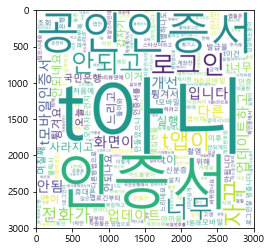

In [351]:
plt.imshow(w,interpolation='bilinear')